In [1]:
%pylab inline
import skimage.io
from scipy.ndimage.morphology import binary_erosion, binary_dilation

Populating the interactive namespace from numpy and matplotlib


# Лаб №1

Дата сдачи: 17-10-2016 00:00 MSK UTC+3

### 1. Построение морфологического скелета

Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

Содержание отчета:

- Исходные изображения
- Код программы
- Результат работы программы

In [2]:
def fancy_show(imgs, *, n_cols=None, fig_dim=None):
    if type(imgs) == numpy.ndarray:
        imgs = [imgs]
    if len(imgs) == 1:
        n_rows = 1
        n_cols = 1
        if fig_dim == None:
            fig_dim = 5
        figsize = (fig_dim, fig_dim)
    else:
        if n_cols == None:
            n_cols = min(len(imgs), 3)
        n_rows = int(ceil(len(imgs) / n_cols))
        if fig_dim == None:
            fig_dim = 15
    figsize = (fig_dim, fig_dim / n_cols * n_rows)
    fig = plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.imshow(img, cmap='gray', interpolation='none')

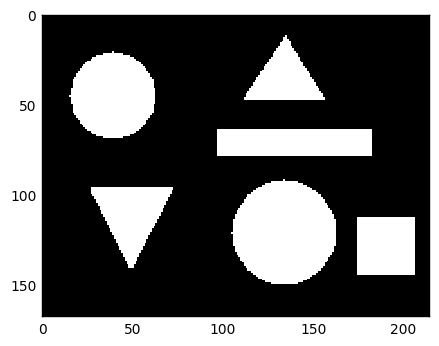

In [3]:
img = (imread('img.png') > 0.5)
fancy_show(img)

In [4]:
r = 3
struct_el = array([
    [
        hypot(row, col) <= r for col in range(-r, r + 1)
    ] for row in range(-r, r + 1)
])

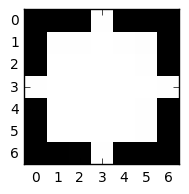

In [5]:
fancy_show(struct_el, fig_dim=2)

In [6]:
def build_skeleton(img, struct_el, return_steps=True):
    img = img.astype(bool)
    struct_el = struct_el.astype(bool)
    img = img.copy()
    if return_steps:
        steps = []
    else:
        skeleton = zeros_like(img, dtype=bool)
    while True:
        img_e = binary_erosion(img, structure=struct_el)
        if not(img_e.any()):
            break
        img_ed = binary_dilation(img_e, structure=struct_el)
        diff = img * invert(img_ed)
        if return_steps:
            steps.append(diff)
        else:
            skeleton += diff
        img = img_e
    if return_steps:
        steps.append(img)
        return steps
    else:
        return skeleton

def combine_steps(steps):
    return apply_along_axis(any, axis=0, array=array(steps))

def reconstruct_steps(steps, struct_el):
    result = np.zeros_like(steps[0])
    for step in reversed(steps):
        result = binary_dilation(result, struct_el) + step
    return(result)

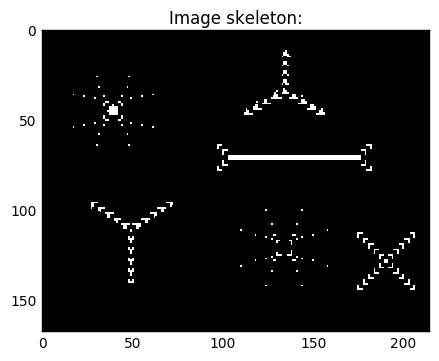

In [7]:
skeleton = build_skeleton(img, struct_el, return_steps=False)
fancy_show(skeleton)
imsave(skeleton.png)

Looks good to me.


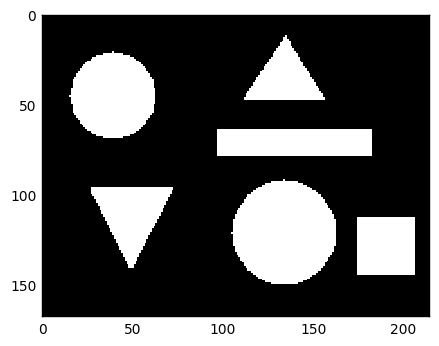

In [8]:
img_sr = reconstruct_steps(build_skeleton(img, struct_el), struct_el)
fancy_show(img_sr)
if any(img != img_sr):
    print('Crap, i messed up somewhere.')
else:
    print('Looks good to me.')